In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("netflix_titles .csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,


# BuzzWords in Dataset using WordCloud

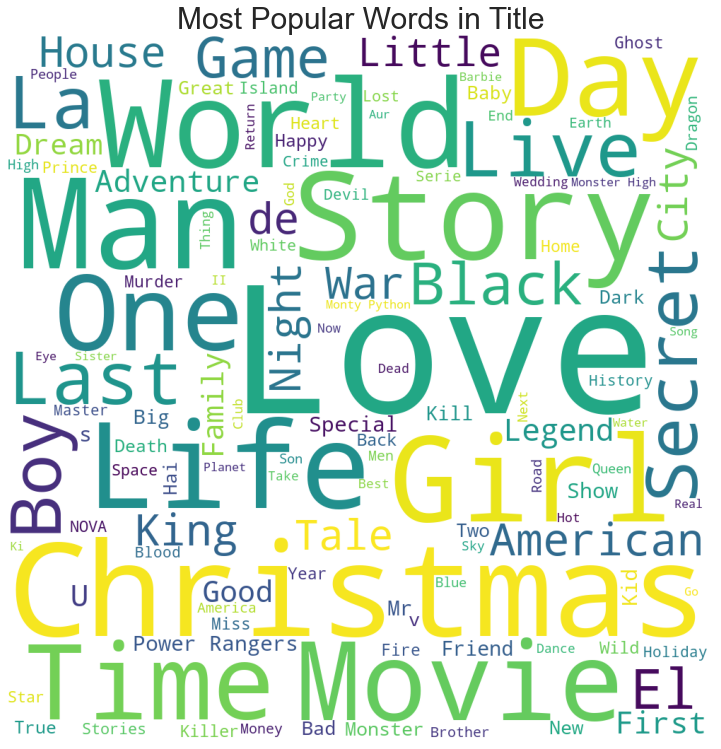

In [13]:
#Generate a Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,  height = 1000, max_words = 121).generate(" ".join(df['title']))
  
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 30)
plt.show()

# BuzzWords in Dataset using WordCloud


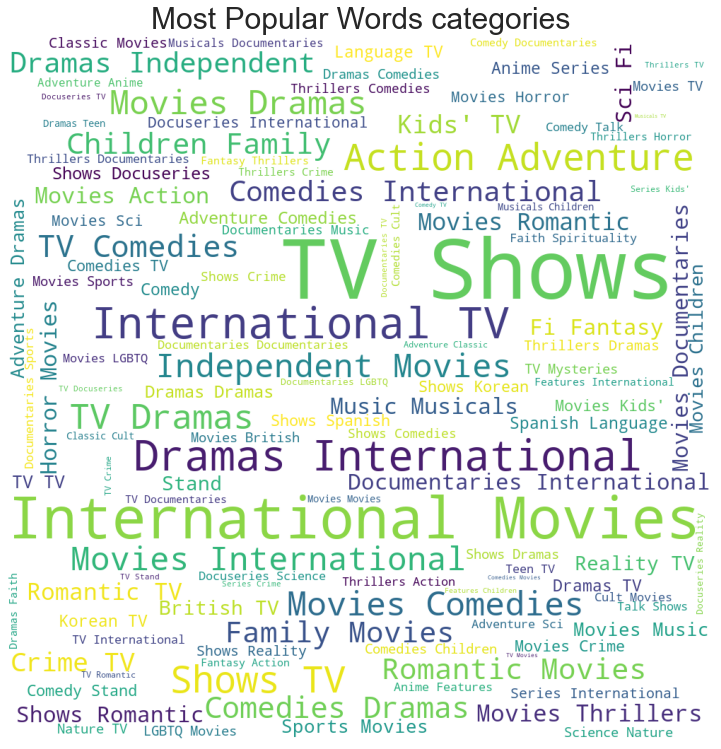

In [14]:
#Generate a Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,  height = 1000, max_words = 121).generate(" ".join(df['listed_in']))
  
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words categories',fontsize = 30)
plt.show()

# Data cleaning for categories

In [15]:
import re
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text)
    text = re.sub('#', '', text)
    text = re.sub('-', '', text)
    text = re.sub(',', '', text)
    text = re.sub('&', '', text)
    text = re.sub(':', '', text)
    text = re.sub('Movies', '', text)
    text = re.sub('TV Shows', '', text)
    text = re.sub('RT[\s]+', '', text)
    text = re.sub('https?:\/\/\S+', '', text)
    text = text.lower()
    return text

In [16]:
df['listed_in'] = df['listed_in'].apply(cleanTxt)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,international tv dramas tv scifi fantasy,In a future where the elite inhabit an island ...,2020.0,8.0,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,dramas international,After a devastating earthquake hits Mexico Cit...,2016.0,12.0,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,horror international,"When an army recruit is found dead, his fellow...",2018.0,12.0,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,action adventure independent scifi fantasy,"In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,dramas,A brilliant group of students become card-coun...,2020.0,1.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99,dramas international,When Lebanon's Civil War deprives Zozo of his ...,2020.0,10.0,
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,dramas international music musicals,A scrappy but poor boy worms his way into a ty...,2019.0,3.0,
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44,documentaries international music musicals,"In this documentary, South African rapper Nast...",2020.0,9.0,
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,,international reality tv,Dessert wizard Adriano Zumbo looks for the nex...,2020.0,10.0,1


In [17]:
dfCat=df['listed_in']

In [18]:
dfCat.head()

0       international  tv dramas tv scifi  fantasy
1                            dramas international 
2                           horror  international 
3    action  adventure independent  scifi  fantasy
4                                           dramas
Name: listed_in, dtype: object

In [19]:
freq = pd.Series(' '.join(dfCat).split()).value_counts()[:10]
freq

international    3636
dramas           2810
tv               2412
comedies         1996
adventure         871
action            871
romantic          864
documentaries     786
independent       673
thrillers         541
dtype: int64

In [20]:
#remove freq word 
freq=list(freq.index)
dfCat1=dfCat.apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [21]:
dfCat1.head()

0    scifi fantasy
1                 
2           horror
3    scifi fantasy
4                 
Name: listed_in, dtype: object

# Tokenisation :


In [ ]:
from textblob import TextBlob 
TextBlob(dfCat1[1]).words

In [ ]:
df['listed_in'].head()

In [22]:
def fusion(dfCat1):
    text=''
    for i in dfCat1:
        text=text+' ' + i
        print(i)
    else :
        print('laaaa')
    return text

In [23]:
t=fusion(dfCat1)

scifi fantasy

horror
scifi fantasy

mysteries
horror

horror
horror

crime
crime docuseries
sports
scifi fantasy




sports




anime series

reality
horror







sports





horror


scifi fantasy
crime

sports





docuseries science nature
sports



british reality

sports
korean
horror
crime mysteries
crime docuseries
horror



horror





horror
horror


music musicals
crime
music musicals
scifi fantasy


british reality

crime
scifi fantasy






korean


lgbtq
sports

faith spirituality






kids' scifi fantasy


kids'
spanishlanguage
children family

lgbtq













horror
reality



docuseries
music musicals

docuseries science nature
docuseries science nature
docuseries science nature
docuseries science nature
anime series
british docuseries science nature
music musicals

children family sports

children family



scifi fantasy

classic

children family



children family
children family
children family

children family
children family music musicals
classic cult

child

In [24]:
t1.strip()

NameError: name 't1' is not defined

In [25]:
from nltk.tokenize import word_tokenize

In [26]:
token = word_tokenize(t)
token

['scifi',
 'fantasy',
 'horror',
 'scifi',
 'fantasy',
 'mysteries',
 'horror',
 'horror',
 'horror',
 'crime',
 'crime',
 'docuseries',
 'sports',
 'scifi',
 'fantasy',
 'sports',
 'anime',
 'series',
 'reality',
 'horror',
 'sports',
 'horror',
 'scifi',
 'fantasy',
 'crime',
 'sports',
 'docuseries',
 'science',
 'nature',
 'sports',
 'british',
 'reality',
 'sports',
 'korean',
 'horror',
 'crime',
 'mysteries',
 'crime',
 'docuseries',
 'horror',
 'horror',
 'horror',
 'horror',
 'music',
 'musicals',
 'crime',
 'music',
 'musicals',
 'scifi',
 'fantasy',
 'british',
 'reality',
 'crime',
 'scifi',
 'fantasy',
 'korean',
 'lgbtq',
 'sports',
 'faith',
 'spirituality',
 'kids',
 "'",
 'scifi',
 'fantasy',
 'kids',
 "'",
 'spanishlanguage',
 'children',
 'family',
 'lgbtq',
 'horror',
 'reality',
 'docuseries',
 'music',
 'musicals',
 'docuseries',
 'science',
 'nature',
 'docuseries',
 'science',
 'nature',
 'docuseries',
 'science',
 'nature',
 'docuseries',
 'science',
 'nature',

# Bag of words :

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
##from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# Create sample set of documents
# Fit the bag-of-words model
bag = vectorizer.fit_transform(token)
# Get unique words / tokens found in all the documents. The unique words
# the features
#print(vectorizer.get_feature_names())
# Associate the indices with each unique word
#print(vectorizer.vocabulary_) 
# Print the numerical feature vector 
df_=pd.DataFrame (bag.toarray(), columns = vectorizer.get_feature_names())


In [29]:
df_.head()

,anime,british,children,classic,comedy,crime,cult,docuseries,faith,family,...,science,scifi,series,shows,spanishlanguage,spirituality,sports,standup,talk,teen
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modèle TF-IDF

In [30]:
from gensim import models 
import numpy as np
from gensim import corpora 
from gensim.utils import simple_preprocess
import pandas as p 


#create the dictionnary and corpus 
myDict=corpora.Dictionary([simple_preprocess(line) for line in token])
BowCorpus=[myDict.doc2bow(simple_preprocess(line)) for line in token]
#create the TF-IDF model :
tfidf=models.TfidfModel(BowCorpus, smartirs='ntc')
#show the TF-IDF weights
for doc in tfidf[BowCorpus]:
    print([p.DataFrame([myDict[id],np.around(freq,decimals=3)] for id, freq in doc)])

[       0    1
0  scifi  1.0]
[         0    1
0  fantasy  1.0]
[        0    1
0  horror  1.0]
[       0    1
0  scifi  1.0]
[         0    1
0  fantasy  1.0]
[           0    1
0  mysteries  1.0]
[        0    1
0  horror  1.0]
[        0    1
0  horror  1.0]
[        0    1
0  horror  1.0]
[       0    1
0  crime  1.0]
[       0    1
0  crime  1.0]
[            0    1
0  docuseries  1.0]
[        0    1
0  sports  1.0]
[       0    1
0  scifi  1.0]
[         0    1
0  fantasy  1.0]
[        0    1
0  sports  1.0]
[       0    1
0  anime  1.0]
[        0    1
0  series  1.0]
[         0    1
0  reality  1.0]
[        0    1
0  horror  1.0]
[        0    1
0  sports  1.0]
[        0    1
0  horror  1.0]
[       0    1
0  scifi  1.0]
[         0    1
0  fantasy  1.0]
[       0    1
0  crime  1.0]
[        0    1
0  sports  1.0]
[            0    1
0  docuseries  1.0]
[         0    1
0  science  1.0]
[        0    1
0  nature  1.0]
[        0    1
0  sports  1.0]
[         0    1
0  br

# Modèle LDA sur le bag of words

In [31]:
import gensim

In [32]:
lda_model =gensim.models.LdaMulticore(BowCorpus, num_topics=10, id2word=myDict, passes=2, workers=2)

In [33]:
lda_model

In [34]:
for idx,topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx,topic))

Topic: 0 
Words: 0.335*"music" + 0.291*"british" + 0.144*"reality" + 0.091*"science" + 0.038*"children" + 0.036*"kids" + 0.023*"scifi" + 0.011*"anime" + 0.010*"fantasy" + 0.004*"spirituality"
Topic: 1 
Words: 0.199*"crime" + 0.185*"talk" + 0.131*"scifi" + 0.114*"family" + 0.086*"children" + 0.086*"musicals" + 0.069*"sports" + 0.044*"music" + 0.032*"korean" + 0.015*"mysteries"
Topic: 2 
Words: 0.442*"spanishlanguage" + 0.140*"faith" + 0.130*"fantasy" + 0.073*"spirituality" + 0.041*"series" + 0.032*"docuseries" + 0.026*"comedy" + 0.020*"kids" + 0.015*"science" + 0.014*"talk"
Topic: 3 
Words: 0.510*"family" + 0.350*"standup" + 0.029*"music" + 0.019*"comedy" + 0.018*"reality" + 0.018*"korean" + 0.009*"anime" + 0.006*"kids" + 0.006*"classic" + 0.005*"cult"
Topic: 4 
Words: 0.428*"crime" + 0.249*"comedy" + 0.090*"lgbtq" + 0.057*"shows" + 0.048*"family" + 0.026*"horror" + 0.025*"music" + 0.013*"anime" + 0.011*"standup" + 0.008*"kids"
Topic: 5 
Words: 0.279*"sports" + 0.236*"anime" + 0.189*"co

# -Modèle LDA sur le modèle TF-IDF

In [35]:
corpus_tfidf=tfidf[BowCorpus]
lda_model_tfidf = models.LdaMulticore(corpus_tfidf, num_topics=3, id2word=myDict, passes=2, workers=4)

In [36]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.201*"children" + 0.155*"crime" + 0.092*"british" + 0.087*"reality" + 0.080*"sports" + 0.062*"korean" + 0.054*"classic" + 0.036*"mysteries" + 0.034*"science" + 0.024*"teen"
Topic: 1 Word: 0.142*"standup" + 0.140*"horror" + 0.132*"docuseries" + 0.119*"musicals" + 0.107*"scifi" + 0.063*"anime" + 0.054*"spanishlanguage" + 0.051*"series" + 0.028*"crime" + 0.028*"nature"
Topic: 2 Word: 0.211*"family" + 0.162*"kids" + 0.138*"comedy" + 0.112*"fantasy" + 0.106*"music" + 0.035*"cult" + 0.030*"lgbtq" + 0.028*"children" + 0.022*"faith" + 0.022*"features"


# Evaluation de la performance du modèle LDA TF-IDF

In [37]:
for index, score in sorted(lda_model_tfidf[BowCorpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index,5)))


Score: 0.6625382304191589	 
Topic: 0.142*"standup" + 0.140*"horror" + 0.132*"docuseries" + 0.119*"musicals" + 0.107*"scifi"

Score: 0.16873317956924438	 
Topic: 0.201*"children" + 0.155*"crime" + 0.092*"british" + 0.087*"reality" + 0.080*"sports"

Score: 0.16872864961624146	 
Topic: 0.211*"family" + 0.162*"kids" + 0.138*"comedy" + 0.112*"fantasy" + 0.106*"music"


# No of Movies and TV Series in the Dataset

Movie      5377
TV Show    2410
Name: type, dtype: int64


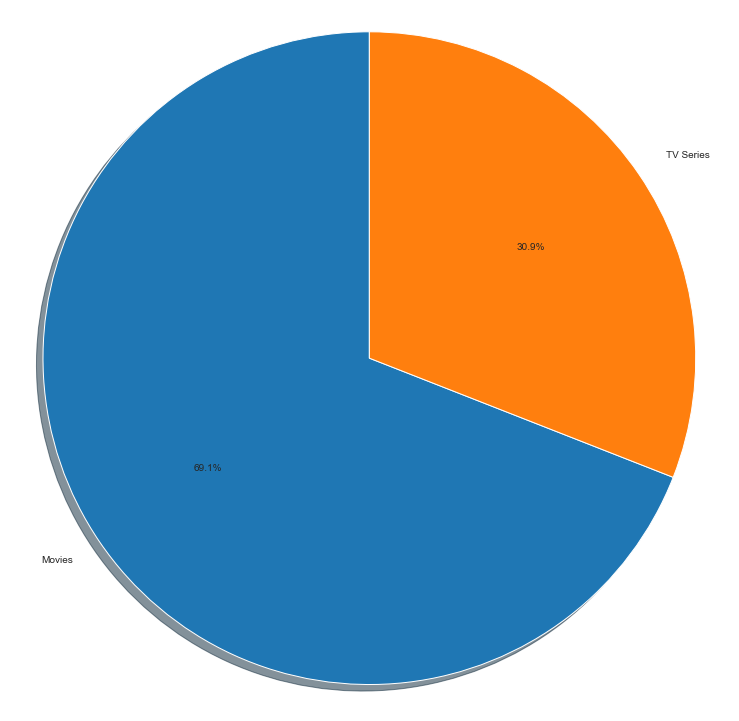

In [38]:

labels = 'Movies','TV Series'
sr = pd.Series(df['type'])
x = sr.value_counts()
print(x)
fig1, ax1 = plt.subplots()
ax1.pie(x, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


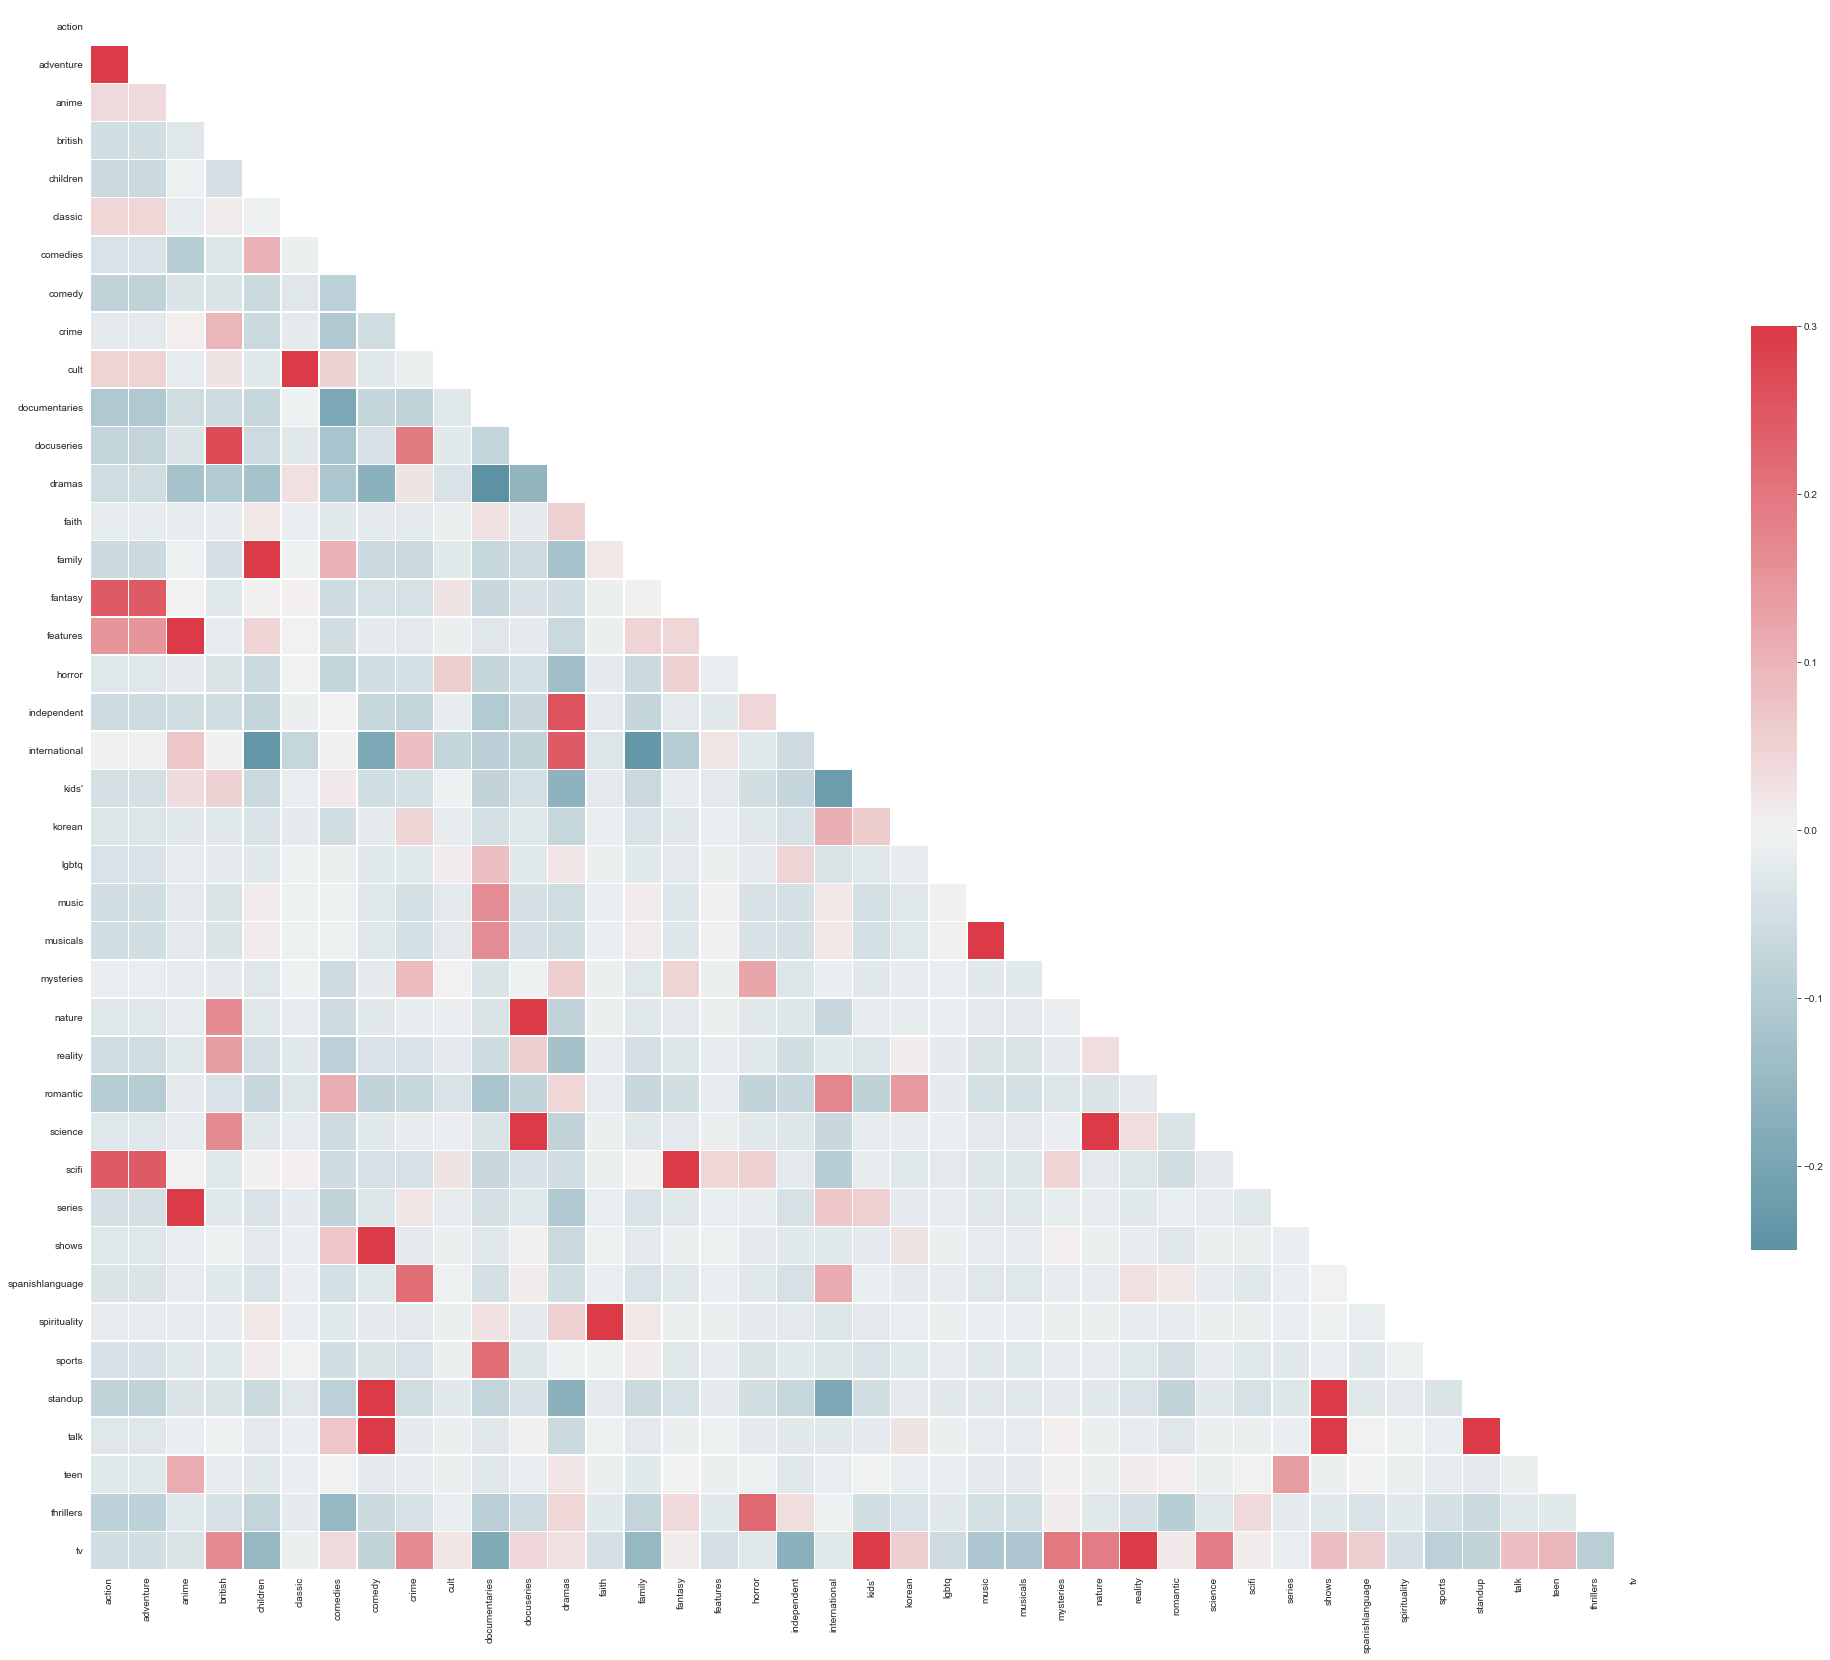

In [39]:
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

data= df['listed_in'].astype(str).apply(lambda s : s.replace('&',' ').replace(',', ' ').split()) 

test = data
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_)
corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(35, 34))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Content released over the Years on Netflix 

In [40]:
temp_df1 = df['release_year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

# Content released over the Years by Content Type

In [41]:
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['release_year'].value_counts().reset_index()
temp_df2 = df2['release_year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)'))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['release_year'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)'))


layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR BY CONTENT TYPE' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

# Distribution of Movie Duration : Histogram 

In [42]:
trace = go.Histogram(
                     x = df['duration'],
                     xbins=dict(size=0.5),
                     marker = dict(color = 'rgb(26, 118, 255)'))
layout = go.Layout(template= "plotly_dark", title = 'Distribution of Movies Duration', xaxis = dict(title = 'Minutes'))
fig = go.Figure(data = [trace], layout = layout)
fig.show()

# Top 20 Countries with Most Content

In [43]:
temp_df = df['country'].value_counts().reset_index()[:20]


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['country'],
                marker = dict(color = 'rgb(153,255,153)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 20 COUNTIES WITH MOST CONTENT' , xaxis = dict(title = 'Countries'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

# Cleaning data for Building Recommendation System

In [44]:
new_df = df[['title','director','cast','listed_in','description']]
new_df.head()


,title,director,cast,listed_in,description
0,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",international tv dramas tv scifi fantasy,In a future where the elite inhabit an island ...
1,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",dramas international,After a devastating earthquake hits Mexico Cit...
2,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",horror international,"When an army recruit is found dead, his fellow..."
3,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",action adventure independent scifi fantasy,"In a postapocalyptic world, rag-doll robots hi..."
4,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",dramas,A brilliant group of students become card-coun...


In [45]:
##!pip install rake-nltk

from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer



In [46]:
#Clean Data
new_df.dropna(inplace = True)

blanks = []  # start with an empty list

col=['title','director','cast','listed_in','description']
for i,col in new_df.iterrows():  # iterate over the DataFrame
    if type(col)==str:            # avoid NaN values
        if col.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

new_df.drop(blanks, inplace=True)

<ipython-input-46-5907f70d3250>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
# initializing the new column
new_df['Key_words'] = ""

for index, row in new_df.iterrows():
    description = row['description']
    
    # instantiating Rake, by default it uses english stopwords from NLTK
    # and discards all puntuation characters as well
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(description)

    # getting the dictionary whith key words as keys and their scores as values
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column for the corresponding movie
    row['Key_words'] = list(key_words_dict_scores.keys())

# dropping the Plot column
new_df.drop(columns = ['description'], inplace = True)


<ipython-input-47-8fb07b1380cf>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
new_df['cast'] = new_df['cast'].map(lambda x: x.split(',')[:3])

new_df['listed_in'] = new_df['listed_in'].map(lambda x: x.lower().split(','))

new_df['director'] = new_df['director'].map(lambda x: x.split(' '))

for index, row in new_df.iterrows():
    row['cast'] = [x.lower().replace(' ','') for x in row['cast']]
    row['director'] = ''.join(row['director']).lower()
    
new_df.set_index('title', inplace = True)

<ipython-input-48-82973b61530c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-82973b61530c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-82973b61530c>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
new_df['bag_of_words'] = ''
columns = new_df.columns
for index, row in new_df.iterrows():
    words = ''
    for col in columns:
        if col != 'director':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
new_df.drop(columns = [col for col in new_df.columns if col!= 'bag_of_words'], inplace = True)

<ipython-input-49-e2307d7d96cb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
new_df.head()

,bag_of_words
title,
7:19,jorgemichelgrau demiánbichir héctorbonilla osc...
23:59,gilbertchan teddchan stellachung henleyhii hor...
9,shaneacker elijahwood johnc.reilly jennifercon...
21,robertluketic jimsturgess kevinspacey katebosw...
46,serdarakar erdalbeşikçioğlu yaseminallen melis...


# Modelling Content based Recommendation System with Natural Language Processing

*  Initialize the Vectorizer to make Document-term matrix 

*  Using the cosine similarity to recommend the movies and tv series 





In [51]:
count = CountVectorizer()
count_matrix = count.fit_transform(new_df['bag_of_words'])

indices = pd.Series(new_df.index)
indices[:5]

0     7:19
1    23:59
2        9
3       21
4       46
Name: title, dtype: object

**Cosine Similarity Matrix**

In [52]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.04761905, 0.        , ..., 0.04550158, 0.09759001,
        0.08908708],
       [0.04761905, 1.        , 0.        , ..., 0.        , 0.048795  ,
        0.04454354],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.04166667],
       ...,
       [0.04550158, 0.        , 0.        , ..., 1.        , 0.04662524,
        0.04256283],
       [0.09759001, 0.048795  , 0.        , ..., 0.04662524, 1.        ,
        0.13693064],
       [0.08908708, 0.04454354, 0.04166667, ..., 0.04256283, 0.13693064,
        1.        ]])

**Recommendation Function to return 10 movies/tv shows based on the given title **

In [53]:
def recommendations(Title, cosine_sim = cosine_sim) :
    
    recommended_movies = []    
    idx = indices[indices == Title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    top_10_indexes = list(score_series.iloc[1:11].index)
    
    for i in top_10_indexes:
        recommended_movies.append(list(new_df.index)[i])
        
    return recommended_movies

In [57]:
recommendations('war') 

IndexError: index 0 is out of bounds for axis 0 with size 0